# Spiking neural networks

Spiking neural networks are nonlinear systems that **respond to input by integrating signals over time**.
Put differently, they react to signals with some *delay*.
As an example, the [leaky integrate-and-fire](https://neuronaldynamics.epfl.ch/online/Ch1.S3.html) (LIF) neuron model integrates some incoming current until a threshold is reached where it fires a signal (`1`). Until that point in time, the neuron was silent (`0`).


## Imports

Before we get started, we need to import some dependencies: numpy and matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from urllib.request import urlretrieve

## Leaky integrator neuron models

One of the simplest neuron-like models is the [leaky integrator](https://en.wikipedia.org/wiki/Leaky_integrator).
It takes some input current and integrates it over time, but with a leak term trending towards its resting state.

:::{figure-md} started-li
<img src="li.gif" alt="leaky integrator" class="bg-primary mb-1" >

A leaky integrator that integrates current over time into its membrane potential.
The left panel shows a constant input signal while the right shows a current oscillating between $[-0.1;0.1]A$.
Note that the leaky integrator can produce *negative* membrane voltages.
:::

This type of neuron provides a continuous voltage, indicating the amount of current it builds up over time.
The neuron voltage ($v$) evolves as follows:

$$
\begin{align*}
    \dot{v} &= 1/\tau (i - v) \\
\end{align*}
$$

## Task 0: Generate input data

To begin with, generate **at least** 1000 consecutive steps of input data.
To keep things simple, the data should simply be 1000 ones (1), similar to the left panel above.

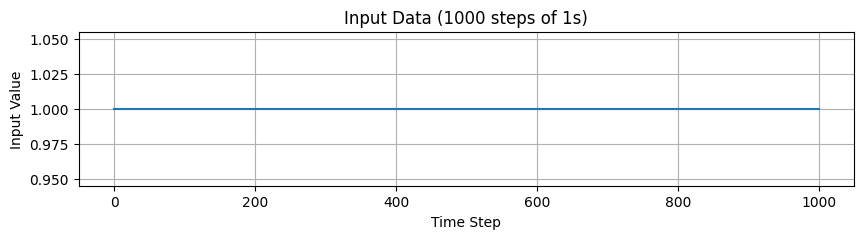

In [ ]:
# Task 0: Generate input data
input_data = np.ones(1000)

# Let's plot the input to visualize it
plt.figure(figsize=(10, 2))
plt.plot(input_data)
plt.title("Input Data (1000 steps of 1s)")
plt.xlabel("Time Step")
plt.ylabel("Input Value")
plt.grid(True)
plt.show()

## Task 1: Implement a leaky integrator

Use the equation above to implement a leaky-integrator.
To keep things simple, we will use [Euler's method](https://en.wikipedia.org/wiki/Euler_method) to calculate the evolution of the equation.
That is, the value of the next timestep is simply the value of the previous timestep plus the function evaluated at the next timestep

$$
y_{n + 1} = y_n + hf(t_n, y_n)
$$

Where $h$ controls the size of the step. To keep things simple, we'll assume $h$ is equivalent to the inverse of our time constant, $1/\tau$.

The simplest way to implement this is by looping through the timesteps one by one.
Note that you must somehow keep track of the current value of $v$ in the equation above.

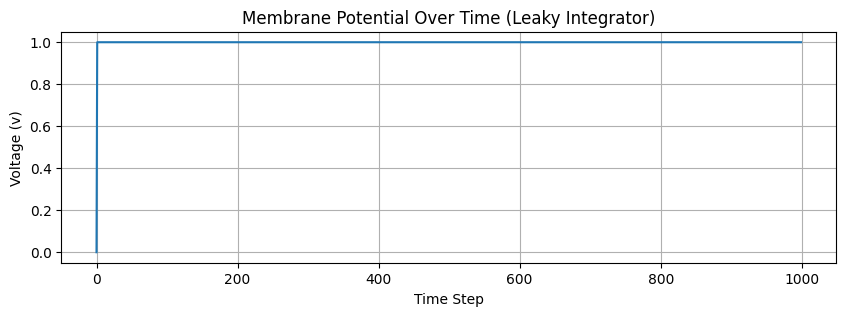

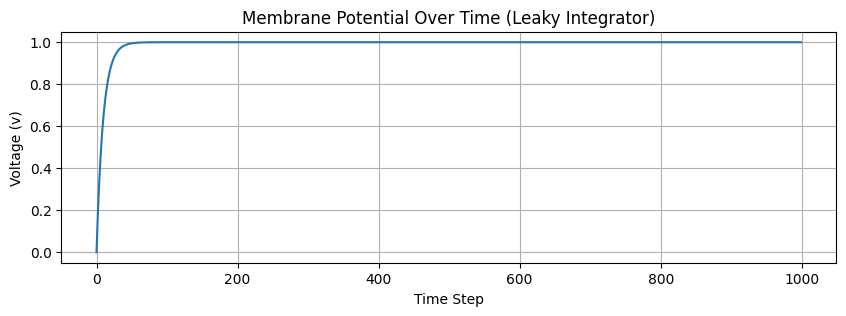

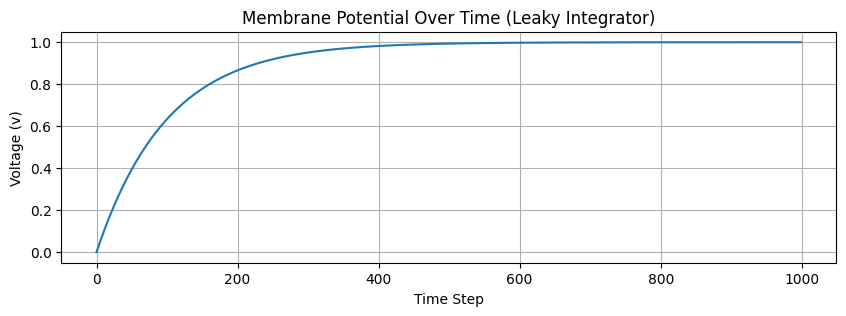

In [ ]:
def leaky_integrator(input_data, tau):
    # Loop through the input one step at the time
    v = np.zeros(len(input_data))
    for t in range(1, len(input_data)):
      dv = (-v[t-1] + input_data[t]) / tau
      v[t] = v[t-1] + dv
    return v


# Plot the output
plt.figure(figsize=(10, 3))
plt.plot(leaky_integrator(input_data, 1))
plt.title("Membrane Potential Over Time (Leaky Integrator)")
plt.xlabel("Time Step")
plt.ylabel("Voltage (v)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(leaky_integrator(input_data, 10))
plt.title("Membrane Potential Over Time (Leaky Integrator)")
plt.xlabel("Time Step")
plt.ylabel("Voltage (v)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(leaky_integrator(input_data, 100))
plt.title("Membrane Potential Over Time (Leaky Integrator)")
plt.xlabel("Time Step")
plt.ylabel("Voltage (v)")
plt.grid(True)
plt.show()


## Leaky integrate-and-fire neuron models

The [leaky integrate-and-fire model](https://neuronaldynamics.epfl.ch/online/Ch1.S3.html) (LIF) is a popular choice for a neuron models because it is relatively simple to simulate, while still exhibiting interesting spiking dynamics.

:::{figure-md} started-lif
<img src="spikes.gif" alt="no-current" class="bg-primary mb-1" >

Three examples of how the LIF neuron model responds to three different, but constant, input currents: 0.0, 0.1, and 0.3. At 0.3, we see that the neuron fires a series of spikes, followed by a membrane "reset".
Note that the neuron parameters are non-biological and that the memebrane voltage threshold is 1.
:::

The LIF model works like the leaky integrator, except when the neuron membrane voltage crosses the threshold $v_{th}$.
If that happens, the membrane voltage resets and a spike (`1`) is emitted.
In all other instances, the neuron outputs (`0`'s).
From a control perspective, that is a quite interesting property because it resembles a binary "gate" that is either open or closed.

The LIF dynamics are implemented as follows (note the similarity with the leaky integrator)

$$
\begin{align*}
\dot{v} &= 1/\tau (i - v) \\
\end{align*}
$$

with the jump equation

$$
\begin{align*}
    v &= (1-z) v + z
\end{align*}
$$

Where $z$ represents a spiking tensors with values $\in \{0, 1\}$.

## Task 2: Implement a leaky integrate-and-fire neuron

Use Euler's method as you did for the leaky integrator above to implement the LIF dynamics.

<ipython-input-23-a9a3179d9b4c>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[t] = v[t-1] + dv


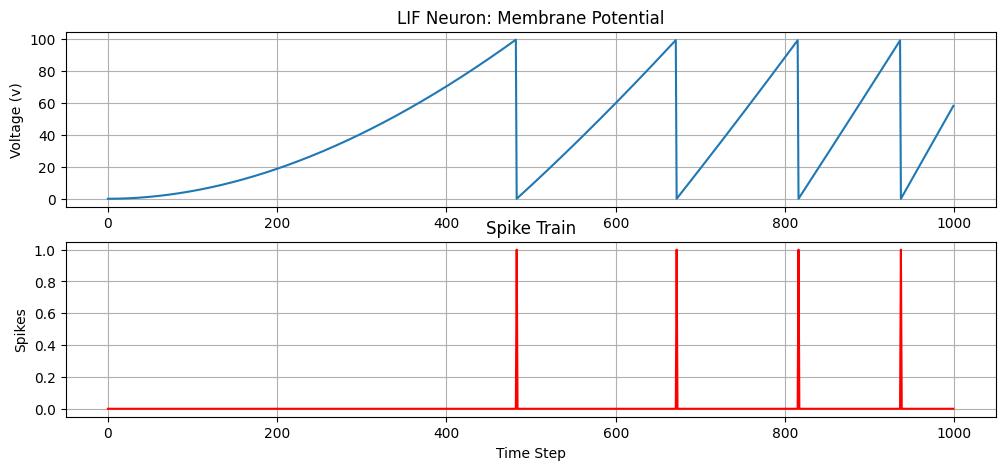

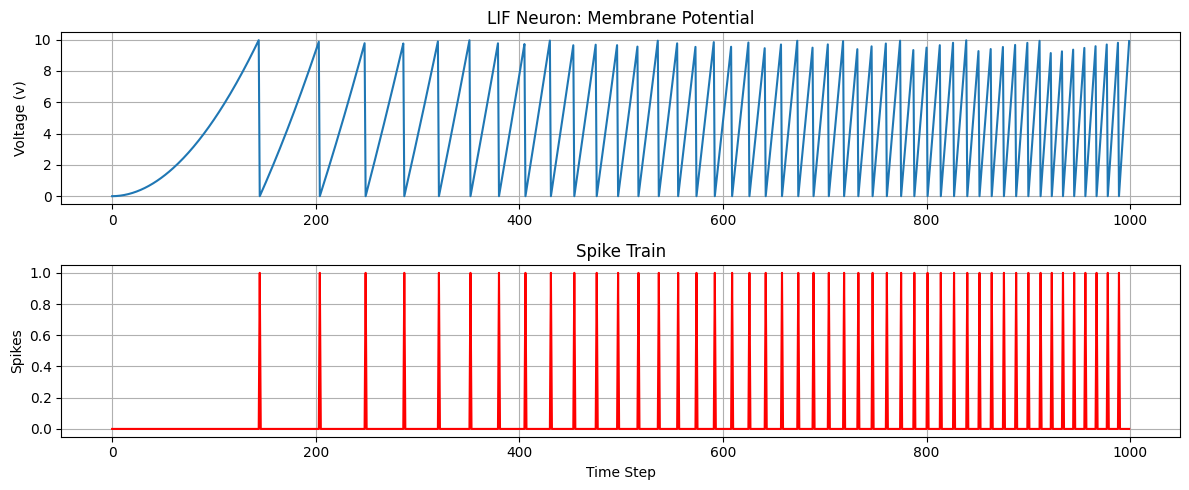

In [ ]:
def leaky_integrate_and_fire(input_data, tau, v_th):
    # Loop through the input one step at the time
    timesteps = len(input_data)
    v = np.zeros(timesteps)
    spikes = np.zeros(timesteps)
    I = input_data
    for t in range(1, timesteps):
        dv = (-v[t-1] + [t]) / tau
        v[t] = v[t-1] + dv

        if v[t] >= v_th:
            spikes[t] = 1
            v[t] = 0
    return v, spikes

# Plot the output
# output, membrane = leaky_integrate_and_fire(input_data,1)
# plt.plot(membrane)
# plt.scatter(range(len(input_data)), output)


# Plot voltage and spikes
plt.figure(figsize=(12, 5))

v, spikes = leaky_integrate_and_fire(input_data,1000, 100)
plt.subplot(2, 1, 1)
plt.plot(v)
plt.title("LIF Neuron: Membrane Potential")
plt.ylabel("Voltage (v)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(spikes, color='red')
plt.title("Spike Train")
plt.xlabel("Time Step")
plt.ylabel("Spikes")
plt.grid(True)

plt.figure(figsize=(12, 5))

v, spikes = leaky_integrate_and_fire(input_data,1000, 10)
plt.subplot(2, 1, 1)
plt.plot(v)
plt.title("LIF Neuron: Membrane Potential")
plt.ylabel("Voltage (v)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(spikes, color='red')
plt.title("Spike Train")
plt.xlabel("Time Step")
plt.ylabel("Spikes")
plt.grid(True)

plt.tight_layout()
plt.show()

## Task 3: High-pass filter


In signal processing and neural modeling, a high-pass filter emphasizes changes in input rather than steady-state input. This can mimic how some neurons respond more to changes in stimuli than to constant input.

A simple way to simulate a high-pass filter is to subtract a low-pass filtered version of the signal from the original.

LIF neurons are essentially [high-pass filters](https://en.wikipedia.org/wiki/High-pass_filter) that filter out signals *below* and pass signals *above* a certain frequency.

Here is a signal at a certain frequency. What happens if you pass that through your LIF model? Can the neuron spike?

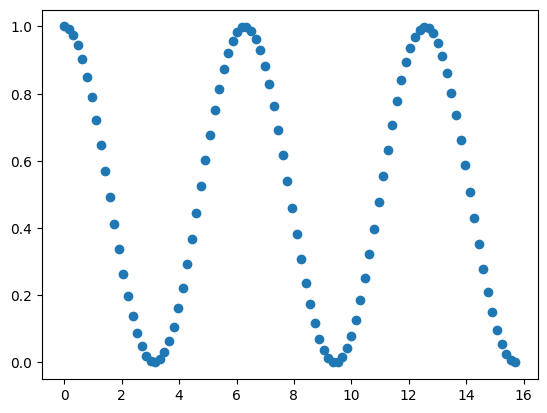

In [ ]:
min_x = 0
max_x = np.pi * 5
samples = 100
data_range = np.linspace(min_x, max_x, samples)
data_signal = (np.cos(data_range) + 1) / 2
plt.scatter(data_range, data_signal)

Now, what if you changed the frequency of the data signal? You can do that by modifying the `max_x` to change the domain of the signal, for instance. Can you find a frequency that doesn't spike? Then you have effectively created a band-pass filter!

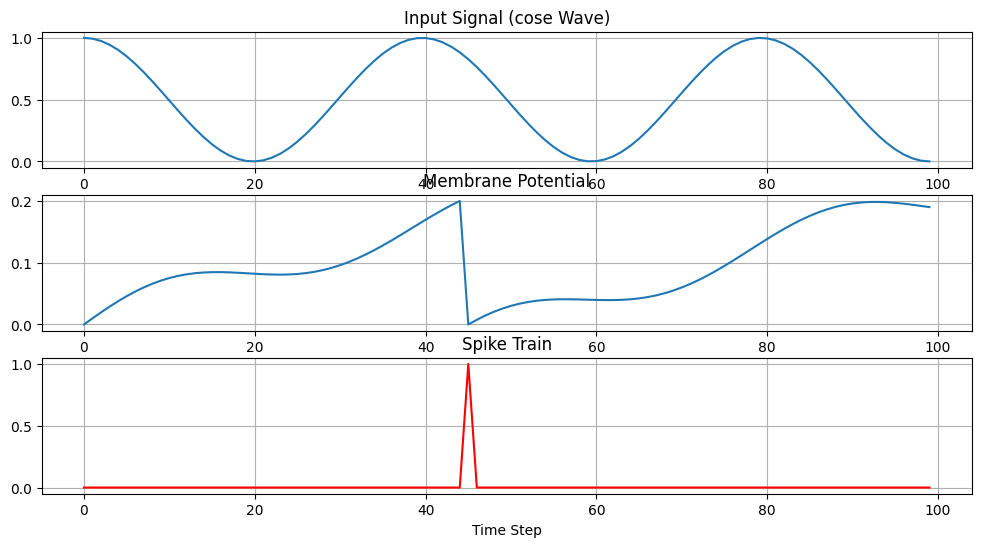

In [ ]:
samples = 1000
tau = 100.0
v_th = 0.2
v_reset = 0.0
# min_x = 0
# max_x = np.pi * 10

# data_range = np.linspace(min_x, max_x, samples)
# data_signal = np.sin(data_range)

min_x = 0
max_x = np.pi * 5
samples = 100
data_range = np.linspace(min_x, max_x, samples)
data_signal = (np.cos(data_range) + 1) / 2

v = np.zeros(samples)
spikes = np.zeros(samples)

for t in range(1, samples):
    dv = (-v[t-1] + data_signal[t]) / tau
    v[t] = v[t-1] + dv
    if v[t] >= v_th:
        spikes[t] = 1
        v[t] = v_reset

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data_signal)
plt.title("Input Signal (cose Wave)")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(v)
plt.title("Membrane Potential")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(spikes, color='red')
plt.title("Spike Train")
plt.xlabel("Time Step")
plt.grid(True)

### Task 3.1: Band-pass filter (optional)

A band-pass filter allows a specific range of frequencies to pass through. Can you combine two high-pass filters to create one single band-pass filter? You would have to create two high-pass filters, (1) one with a high cutoff and (2) one with a low cutoff, and combine them somehow.

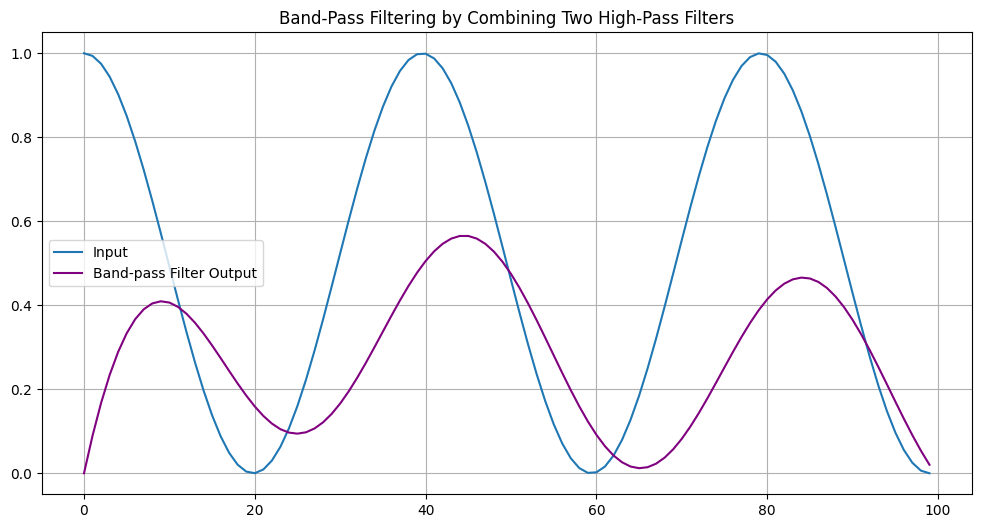

In [ ]:
def high_pass_filter(input_signal, tau_hp):
    hp = np.zeros_like(input_signal)
    for t in range(1, len(input_signal)):
        dhp = (-hp[t-1] + input_signal[t]) / tau_hp
        hp[t] = hp[t-1] + dhp
    return input_signal - hp

min_x = 0
max_x = np.pi * 5
samples = 100
data_range = np.linspace(min_x, max_x, samples)
data_signal = (np.cos(data_range) + 1) / 2

# Two high-pass filters
tau_low = 100  # low cutoff
tau_high = 10  # high cutoff

hp_low = high_pass_filter(data_signal, tau_low)   # keeps fast + mid
hp_high = high_pass_filter(data_signal, tau_high) # keeps only fast

band_pass = hp_low - hp_high

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data_signal, label='Input')
plt.plot(band_pass, label='Band-pass Filter Output', color='purple')
plt.legend()
plt.title("Band-Pass Filtering by Combining Two High-Pass Filters")
plt.grid(True)
plt.show()

### Task 3.2: LIF neurons as band-pass filters (optional)

We wrote that LIF neurons are technically high-pass filters because they filter away frequencies below a certain cut-off.
They are *actually* also low-pass filters in some sense. Can you figure out why?

## Task 4: Represent a spiking time-surface in Jupyter

We are now going to look at events / spikes **in time**.
Events are nothing but discrete values in time. But they represent important information, both in the spatial and temporal dimension.
As an example, when sound hits your inner ear, it is decomposed and converted into spikes, roughly representing a discrete spectrogram.

Here's an example of an audio recording of a digit from the [Spiking Heidelberg Digit dataset](https://zenkelab.org/resources/spiking-heidelberg-datasets-shd/).
Every green dot represents a spike.

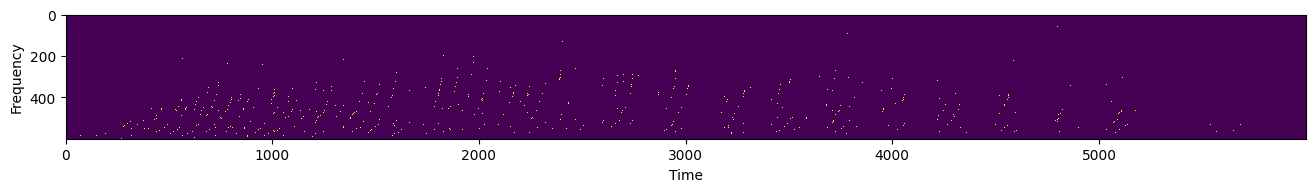

In [ ]:
filename, _ = urlretrieve("https://github.com/ncskth/phd-course/raw/main/book/module1/sound_data.dat")
data = torch.load(filename)
plt.figure(figsize=(16, 4))
plt.gca().set_xlabel("Time")
plt.gca().set_ylabel("Frequency")
plt.imshow(data, interpolation="none")

Note the `vmax=0.1`. What happens if you remove it? Why do we need it? Can you explain what that parameter is doing?

Hint: plotting sparse data can hide a tremendous amount of detail if we're not careful.

What you see is a beautiful visualization of a signal in space **and** in time.
In this kind of representation, time is tremendously important.
One way to think about it is to view sound signals as space-time "surfaces"; we need to "see" the whole surface to make sense of it.
Put differently, any downstream process that is sent your signal needs to somehow integrate time, otherwise it cannot capture the necessary information.

Time surfaces can be "stretched" and "compacted" in time by squeezing the signals closer together or prying them further apart.
This is similar to sharpening and blurring effects in pictures.
You'll see how that can work now.

### Task 4.1: Continuous time surface with leaky integrators

Run the data above through your **leaky integrator** model and plot the output as a two-dimensional picture, as above.
What does the plot represent?
What happens when you increase/decrease the time constant $\tau$?

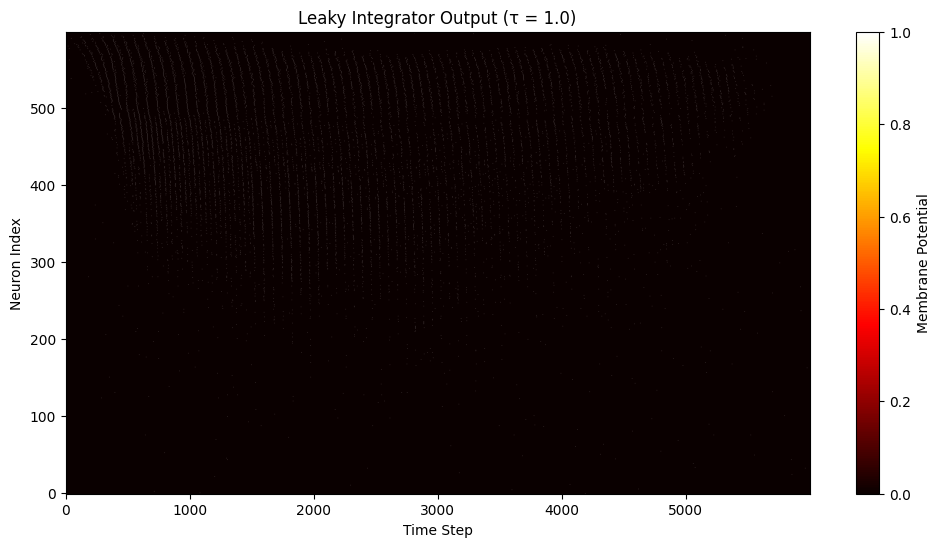

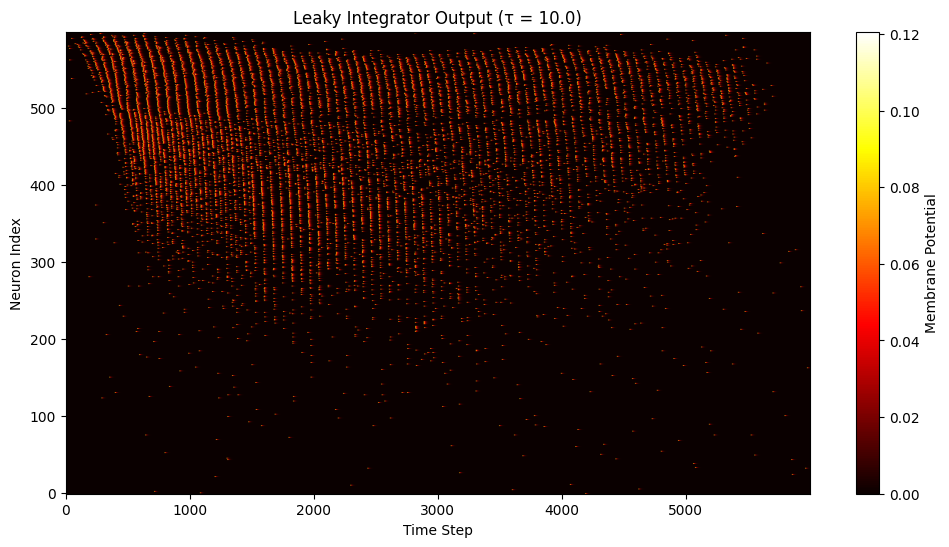

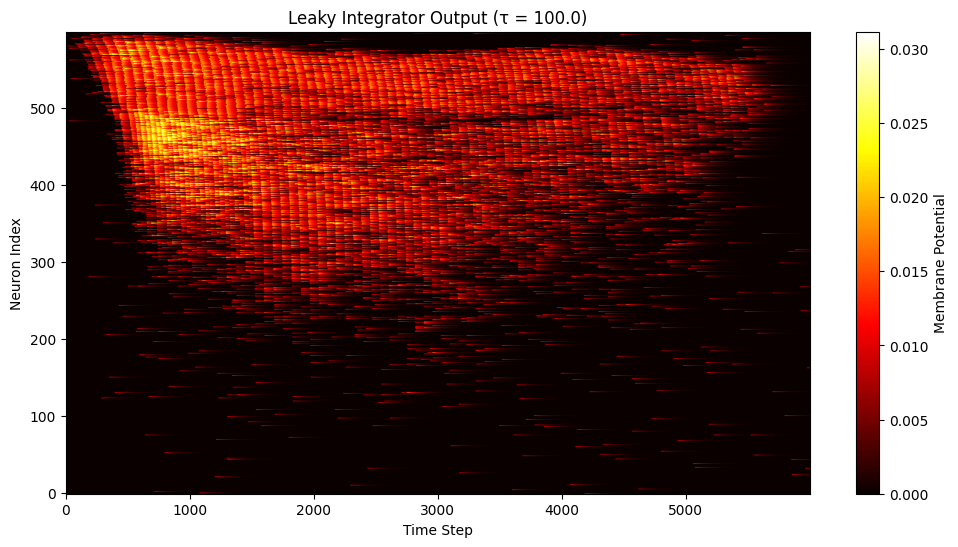

In [ ]:
def leaky_integrator(spike_matrix, tau):
    num_neurons, timesteps = spike_matrix.shape
    v = np.zeros((num_neurons, timesteps))

    for n in range(num_neurons):
        for t in range(1, timesteps):
            dv = (-v[n, t-1] + spike_matrix[n, t]) / tau
            v[n, t] = v[n, t-1] + dv

    return v

tau = 1.0
smoothed_output = leaky_integrator(data, tau)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()


tau = 10.0
smoothed_output = leaky_integrator(data, tau)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()


tau = 100.0
smoothed_output = leaky_integrator(data, tau)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()

### Task 4.2: Discrete time surface with leaky integrator-and-fire models

Run the data above through you **leaky integrate-and-fire model** and plot the output as a two-dimensional picture, as above. What does the plot represent? What happens when you increase/decrease the time constant $\tau$?

<ipython-input-60-60ba668cf3d2>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[t] = v[t-1] + dv


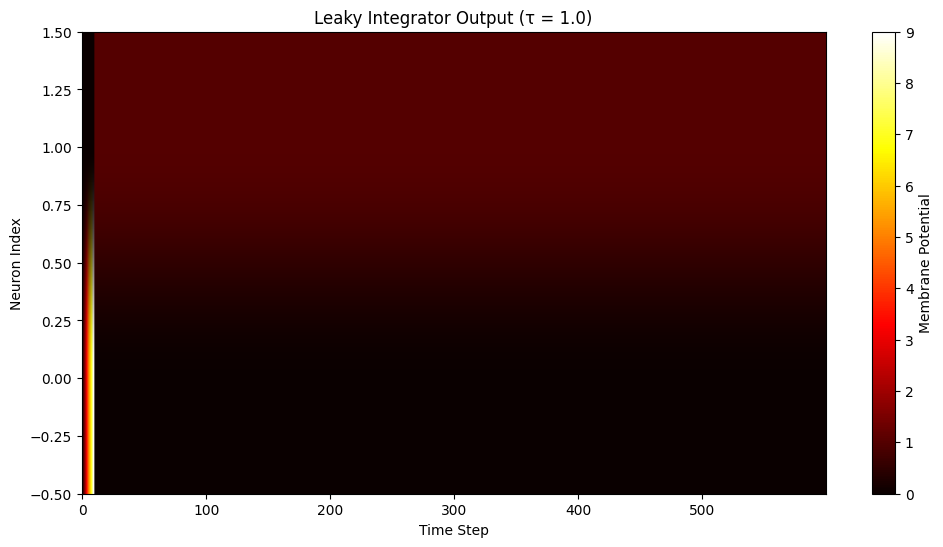

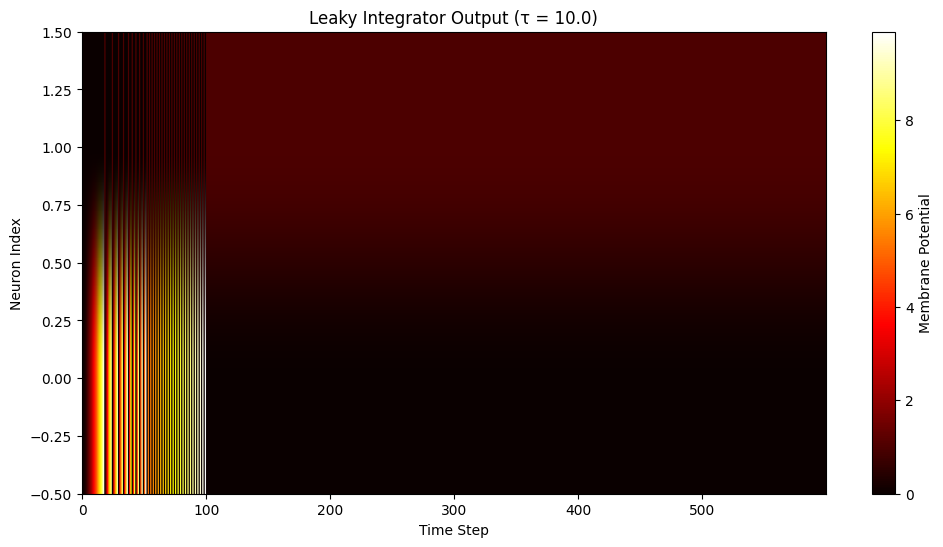

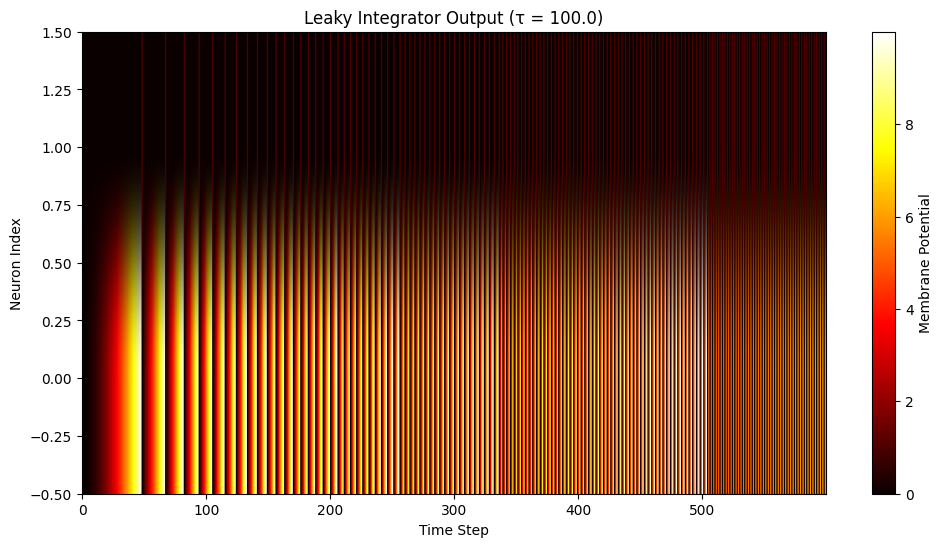

In [ ]:
def leaky_integrate_and_fire(input_data, tau, v_th):
    # Loop through the input one step at the time
    timesteps = len(input_data)
    v = np.zeros(timesteps)
    spikes = np.zeros(timesteps)
    I = input_data
    for t in range(1, timesteps):
        dv = (-v[t-1] + [t]) / tau
        v[t] = v[t-1] + dv

        if v[t] >= v_th:
            spikes[t] = 1
            v[t] = 0
    return v, spikes

tau = 1.0
smoothed_output = leaky_integrate_and_fire(data, tau,10)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()


tau = 10.0
smoothed_output = leaky_integrate_and_fire(data, tau,10)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()


tau = 100.0
smoothed_output = leaky_integrate_and_fire(data, tau,10)
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Membrane Potential')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.title(f"Leaky Integrator Output (τ = {tau})")
plt.show()

### Task 4.3: Use notebook sliders to visualize the difference (optional)

To understand the effects of $\tau$ for the above time surfaces it would be helpful to have some form of sliders to continuously change the value and visualize the effect.
Luckily, this can be done with Jupyter Notebooks! Use the [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) to create a slider that changes the value of the time constant.
Every time the time constant changes, you should regenerate and visualize the plot so we can observe the result.import ipywidgets as widgets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Leaky integrator function
def leaky_integrator(spike_matrix, tau):
    num_neurons, timesteps = spike_matrix.shape
    v = np.zeros((num_neurons, timesteps))

    for n in range(num_neurons):
        for t in range(1, timesteps):
            dv = (-v[n, t-1] + spike_matrix[n, t]) / tau
            v[n, t] = v[n, t-1] + dv
    return v

# Interactive function for plotting
def visualize_integrator(tau):
    smoothed_output = leaky_integrator(data, tau)

    plt.figure(figsize=(12, 5))
    plt.imshow(smoothed_output, aspect='auto', cmap='hot', origin='lower')
    plt.colorbar(label='Membrane Potential')
    plt.title(f"Leaky Integrator Output (τ = {tau})")
    plt.xlabel("Time Step")
    plt.ylabel("Neuron Index")
    plt.grid(False)
    plt.show()

# Create interactive slider
interact(visualize_integrator, tau=widgets.FloatSlider(value=10.0, min=1.0, max=50.0, step=1.0))


interactive(children=(FloatSlider(value=10.0, description='tau', max=50.0, min=1.0, step=1.0), Output()), _dom…

<function __main__.visualize_integrator(tau)>